In [ ]:
!wget 'https://drive.google.com/u/0/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download' -O mumbai_houses_task.csv

--2023-06-02 05:01:58--  https://drive.google.com/u/0/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download
Resolving drive.google.com (drive.google.com)... 173.194.213.113, 173.194.213.100, 173.194.213.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.213.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download [following]
--2023-06-02 05:01:58--  https://drive.google.com/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v7h8dvmh6o33h6ltiuuf4qvn1e9bap67/1685682075000/06789500609444976556/*/1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2?e=download&uuid=e2d5fd53-ccc7-44f2-a209-b0cda8f7e0f0 [following]
--2023-06-02 05:01:59--  https://doc-10-90-docs.googleuserconten

In [ ]:
!wget 'https://drive.google.com/u/0/uc?id=1_cp9Z9Dm297VvfJB-cVlB_Z_L4sFZg4f&export=download' -O csgo_task_update.csv

--2023-06-01 17:59:12--  https://drive.google.com/u/0/uc?id=1_cp9Z9Dm297VvfJB-cVlB_Z_L4sFZg4f&export=download
Resolving drive.google.com (drive.google.com)... 64.233.188.100, 64.233.188.113, 64.233.188.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1_cp9Z9Dm297VvfJB-cVlB_Z_L4sFZg4f&export=download [following]
--2023-06-01 17:59:13--  https://drive.google.com/uc?id=1_cp9Z9Dm297VvfJB-cVlB_Z_L4sFZg4f&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s5t9fl0r4iqvhukhfvb0kakacm27mnep/1685642325000/06789500609444976556/*/1_cp9Z9Dm297VvfJB-cVlB_Z_L4sFZg4f?e=download&uuid=92417a01-6068-45ec-8998-420d6ac1a16a [following]
--2023-06-01 17:59:15--  https://doc-14-90-docs.googleusercontent.co

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# для оценки качества решения задачи регрессии
from sklearn.metrics import mean_squared_error, mean_absolute_error
# для оценки качества решения задачи классификации
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc, r2_score
from sklearn.metrics import max_error
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

## TensorFlow Regressor

In [ ]:
df = pd.read_csv("mumbai_houses_task.csv")

df['Status'] = df['Status'].fillna('Ready to Move')
df['Furnished_status'] = df['Furnished_status'].fillna('Unfurnished')
df = pd.get_dummies(df)
df.shape

(6255, 18)

In [ ]:
y = df["price"]
X = df.drop(["price"], axis=1)

In [ ]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingRegressor().fit(X_train, y_train)
  print("score: ", bag.score(X_test, y_test))


In [ ]:
test(X, y)

score:  0.7808320777733511


In [ ]:
X.describe()

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Status_Ready to Move,Status_Under Construction,neworold_New Property,neworold_Resale,Furnished_status_Furnished,Furnished_status_Semi-Furnished,Furnished_status_Unfurnished,type_of_building_Flat,type_of_building_Individual House
count,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,1185.625260,19.156772,72.868642,2.452278,2.425580,0.821583,0.821583,0.821583,0.999520,0.000480,0.118305,0.881695,0.163229,0.191047,0.645723,0.931735,0.068265
std,636.973259,0.109447,0.058614,0.749534,0.762604,1.291957,1.291957,1.291957,0.021897,0.021897,0.322995,0.322995,0.369604,0.393158,0.478332,0.252221,0.252221
min,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,846.500000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1000.000000,19.147269,72.858019,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X)
X_vt.shape


(6255, 4)

In [ ]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,area,Balcony,parking,Lift
0,629.0,0.0,0.0,0.0
1,974.0,0.0,0.0,0.0
2,968.0,0.0,0.0,0.0
3,629.0,2.0,2.0,2.0
4,1090.0,0.0,0.0,0.0


In [ ]:
test(X_vt, y)

score:  0.33979578293207613


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Status_Ready to Move,Status_Under Construction,neworold_New Property,neworold_Resale,Furnished_status_Furnished,Furnished_status_Semi-Furnished,Furnished_status_Unfurnished,type_of_building_Flat,type_of_building_Individual House
0,-0.873930,-1.132805,0.472871,-0.603461,-0.558106,-0.635972,-0.635972,-0.635972,-45.650849,45.650849,2.729964,-2.729964,-0.441668,-0.485969,0.74071,0.270679,-0.270679
1,-0.332262,-1.132805,0.472871,0.730808,-0.558106,-0.635972,-0.635972,-0.635972,-45.650849,45.650849,2.729964,-2.729964,-0.441668,-0.485969,0.74071,0.270679,-0.270679
2,-0.341683,-0.650339,0.693317,0.730808,0.753296,-0.635972,-0.635972,-0.635972,-45.650849,45.650849,2.729964,-2.729964,-0.441668,-0.485969,0.74071,0.270679,-0.270679
3,-0.873930,-0.009286,-0.371615,-0.603461,-0.558106,0.912191,0.912191,0.912191,0.021905,-0.021905,2.729964,-2.729964,-0.441668,-0.485969,0.74071,0.270679,-0.270679
4,-0.150136,0.189903,-0.320002,-0.603461,-0.558106,-0.635972,-0.635972,-0.635972,0.021905,-0.021905,2.729964,-2.729964,-0.441668,-0.485969,0.74071,0.270679,-0.270679


In [ ]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
test(X_vt, y)

(6255, 8)
score:  0.5428722574366065


In [ ]:
from sklearn.feature_selection import SelectKBest
skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)

score:  0.6620540225472104


In [ ]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,area,latitude,Bedrooms,Bathrooms,Status_Ready to Move,Status_Under Construction
0,629.0,19.032800,2.0,2.0,0.0,1.0
1,974.0,19.032800,3.0,2.0,0.0,1.0
2,968.0,19.085600,3.0,3.0,0.0,1.0
3,629.0,19.155756,2.0,2.0,1.0,0.0
4,1090.0,19.177555,2.0,2.0,1.0,0.0
...,...,...,...,...,...,...
6250,810.0,19.138320,2.0,2.0,1.0,0.0
6251,1400.0,19.221920,3.0,3.0,1.0,0.0
6252,750.0,19.144320,2.0,2.0,1.0,0.0
6253,700.0,19.047201,2.0,2.0,1.0,0.0


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X, y)

In [ ]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,area,latitude,longitude,Bathrooms
0,629.0,19.032800,72.896357,2.0
1,974.0,19.032800,72.896357,2.0
2,968.0,19.085600,72.909277,3.0
3,629.0,19.155756,72.846862,2.0
4,1090.0,19.177555,72.849887,2.0
...,...,...,...,...
6250,810.0,19.138320,72.810020,2.0
6251,1400.0,19.221920,72.854250,3.0
6252,750.0,19.144320,72.824111,2.0
6253,700.0,19.047201,72.872225,2.0


In [ ]:
test(X_rfe, y)

score:  0.8009265665665323


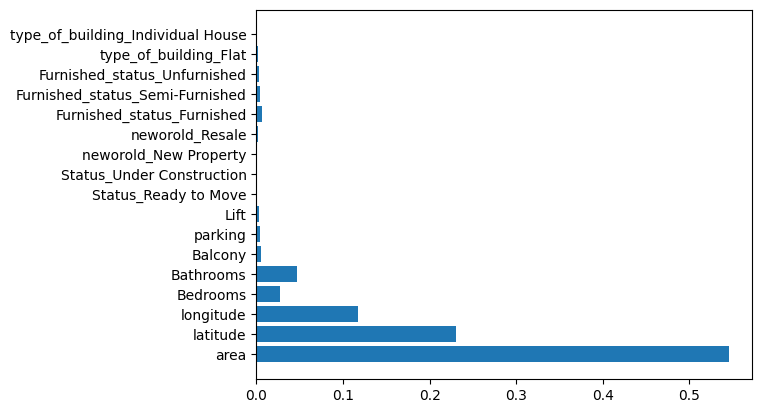

In [ ]:
plt.barh(width=tree.feature_importances_, y=X.columns);#по значимости

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(6255, 2)

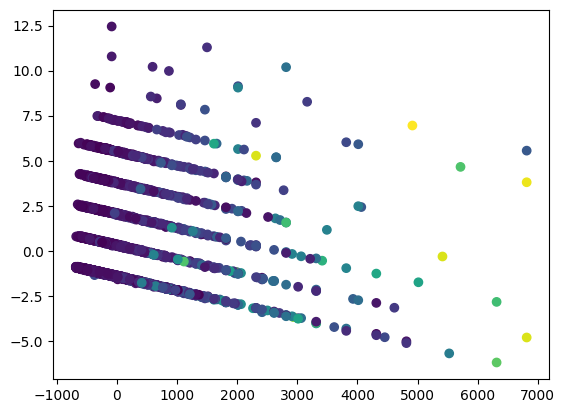

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999964759637001

In [ ]:
test(X_pca, y)

score:  0.4110826233584426


In [ ]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X, y)

In [ ]:
test(X_pca_2, y)

score:  0.4371357842331708


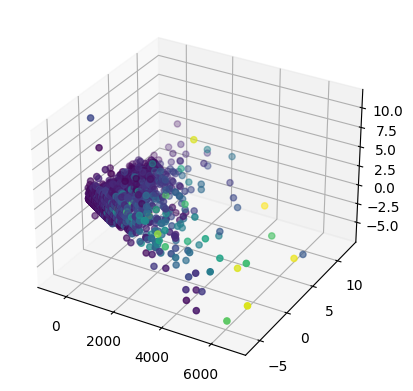

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0], X_pca_2[:,1], X_pca_2[:,2], c=y);

In [ ]:
from sklearn.manifold import TSNE, Isomap


In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled[:2000])

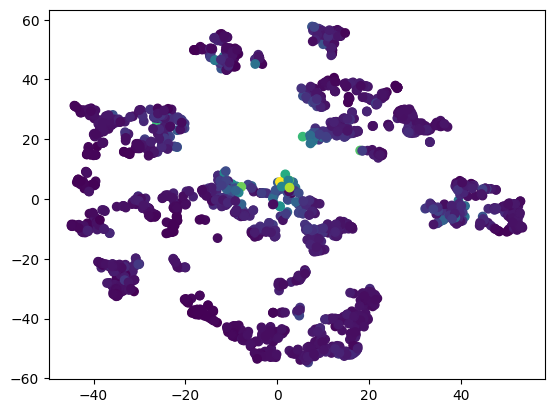

In [ ]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y[:2000]);

In [ ]:
test(X_tsne, y[:2000])

score:  0.4638913879346942


In [ ]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled[:2000])

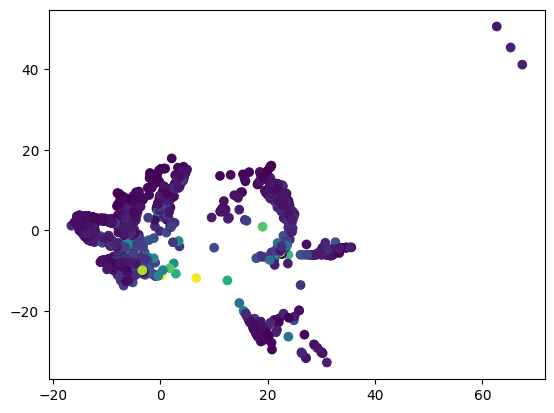

In [ ]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y[:2000]);

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


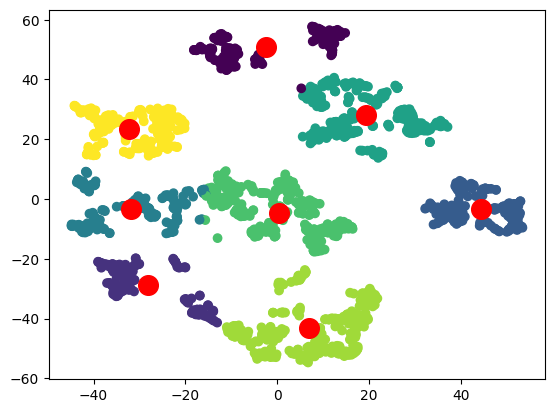

In [ ]:
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [ ]:
silhouette_score(X_tsne, kmeans.labels_)

0.55048436

# TensorFlow Classification

Class

In [ ]:
df = pd.read_csv("csgo_task_update.csv", index_col=0).drop_duplicates()
data = df.sort_values(by='bomb_planted', ascending=False)
data = data[:(data[data['bomb_planted'] == 1].shape[0]*2)]
data.shape




(27368, 18)

In [ ]:
data[data['bomb_planted'] == 0].shape, data[data['bomb_planted'] == 1].shape


((13684, 18), (13684, 18))

In [ ]:
data = data.sample(frac=1)
df = data

In [ ]:
y = df["bomb_planted"]
X = df.drop(["bomb_planted"], axis=1)

In [ ]:
df.shape

(27368, 18)

In [ ]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [ ]:
test(X, y)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2074
           1       0.98      0.99      0.98      2032

    accuracy                           0.98      4106
   macro avg       0.98      0.98      0.98      4106
weighted avg       0.98      0.98      0.98      4106



In [ ]:
X.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_money,t_money,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
count,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000,27368.000000
mean,63.248809,6.626133,6.773823,308.714082,322.823590,7219.190295,9333.634171,3.325015,3.637131,0.005262,0.180503,0.212474,0.175935,0.157191,0.090178,0.087401,0.091055
std,53.480719,4.740662,4.642202,165.963333,162.531913,9318.523322,10636.201205,1.550433,1.506898,0.072347,0.384613,0.409066,0.380772,0.363987,0.286442,0.282427,0.287693
min,0.010000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.420000,3.000000,3.000000,163.000000,197.000000,850.000000,1450.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.770000,6.000000,6.000000,300.000000,345.000000,3400.000000,5350.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,94.950000,10.000000,10.000000,500.000000,500.000000,10200.000000,13712.500000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1.1 Отбираем признаки с высокой дисперсией

In [ ]:
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X)
X_vt.shape

(27368, 9)

In [ ]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_money,t_money,ct_players_alive,t_players_alive
0,4.14,7.0,4.0,196.0,251.0,11650.0,1900.0,2.0,3.0
1,54.91,3.0,2.0,274.0,300.0,26400.0,450.0,4.0,3.0
2,174.95,5.0,8.0,500.0,500.0,17850.0,51600.0,5.0,5.0
3,175.00,6.0,0.0,500.0,500.0,26100.0,19300.0,5.0,5.0
4,174.96,5.0,0.0,500.0,500.0,27000.0,27200.0,5.0,5.0


In [ ]:
test(X_vt, y)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2036
           1       0.98      0.99      0.98      2070

    accuracy                           0.98      4106
   macro avg       0.98      0.98      0.98      4106
weighted avg       0.98      0.98      0.98      4106



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_money,t_money,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0.966743,-1.397749,-0.382115,1.152600,1.090122,-0.554732,2.822146,1.080353,0.904437,-0.072729,-0.469319,1.925214,-0.462057,-0.431866,-0.314828,-0.30947,-0.316507
1,2.088664,0.922645,-0.382115,1.152600,1.090122,1.194504,0.095559,1.080353,0.904437,-0.072729,2.130747,-0.519423,-0.462057,-0.431866,-0.314828,-0.30947,-0.316507
2,0.499277,-1.186804,-1.028372,1.152600,1.090122,1.167675,-0.830540,1.080353,0.904437,-0.072729,-0.469319,1.925214,-0.462057,-0.431866,-0.314828,-0.30947,-0.316507
3,2.089599,1.344535,0.694980,1.152600,1.090122,3.356903,0.518650,1.080353,0.904437,-0.072729,-0.469319,-0.519423,-0.462057,-0.431866,-0.314828,-0.30947,3.159485
4,-0.676122,0.711700,1.125817,-1.233512,-0.774161,-0.388394,-0.750623,-0.854625,-1.086445,-0.072729,-0.469319,-0.519423,2.164233,-0.431866,-0.314828,-0.30947,-0.316507


In [ ]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
test(X_vt, y)

(27368, 2)
              precision    recall  f1-score   support

           0       0.86      0.72      0.79      2036
           1       0.77      0.89      0.82      2070

    accuracy                           0.81      4106
   macro avg       0.81      0.81      0.81      4106
weighted avg       0.81      0.81      0.81      4106



## 1.2 Одномерный отбор признаков

In [ ]:
skb = SelectKBest(k=5)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2036
           1       0.98      0.98      0.98      2070

    accuracy                           0.98      4106
   macro avg       0.98      0.98      0.98      4106
weighted avg       0.98      0.98      0.98      4106



In [ ]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,time_left,ct_health,t_health,ct_players_alive,t_players_alive
0,4.14,196.0,251.0,2.0,3.0
1,54.91,274.0,300.0,4.0,3.0
2,174.95,500.0,500.0,5.0,5.0
3,175.00,500.0,500.0,5.0,5.0
4,174.96,500.0,500.0,5.0,5.0
...,...,...,...,...,...
27363,19.71,131.0,0.0,2.0,0.0
27364,30.55,179.0,151.0,2.0,2.0
27365,94.92,491.0,500.0,5.0,5.0
27366,27.42,143.0,212.0,2.0,3.0


## 1.3 Рекурсивный отбор признаков

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,time_left,ct_health,ct_money,t_money
0,4.14,196.0,11650.0,1900.0
1,54.91,274.0,26400.0,450.0
2,174.95,500.0,17850.0,51600.0
3,175.00,500.0,26100.0,19300.0
4,174.96,500.0,27000.0,27200.0
...,...,...,...,...
27363,19.71,131.0,950.0,0.0
27364,30.55,179.0,2550.0,3700.0
27365,94.92,491.0,12950.0,12350.0
27366,27.42,143.0,1700.0,1450.0


In [ ]:
test(X_rfe, y)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2036
           1       0.98      0.98      0.98      2070

    accuracy                           0.98      4106
   macro avg       0.98      0.98      0.98      4106
weighted avg       0.98      0.98      0.98      4106



## 1.4 Отбор признаков по их значимости

In [ ]:
import matplotlib.pyplot as plt

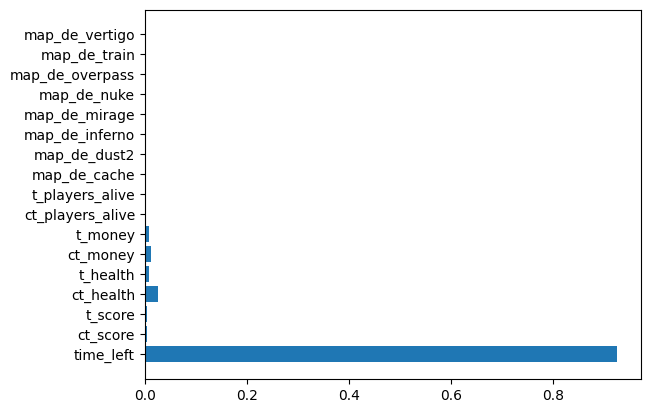

In [ ]:
plt.barh(width=tree.feature_importances_, y=X.columns);

## 2.1 Метод главных компонент

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(27368, 2)

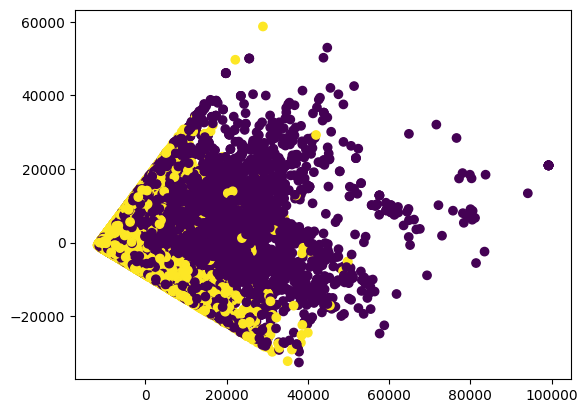

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

In [ ]:
sum(pca.explained_variance_ratio_)

0.999775868980378

In [ ]:
test(X_pca, y)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      2036
           1       0.79      0.76      0.77      2070

    accuracy                           0.78      4106
   macro avg       0.78      0.78      0.78      4106
weighted avg       0.78      0.78      0.78      4106



In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(27368, 3)

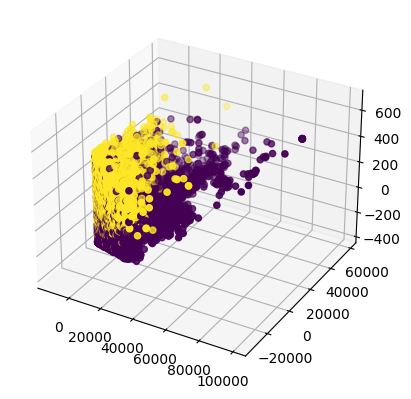

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y);

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999605189996145

In [ ]:
test(X_pca, y)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2036
           1       0.86      0.89      0.87      2070

    accuracy                           0.87      4106
   macro avg       0.87      0.87      0.87      4106
weighted avg       0.87      0.87      0.87      4106



## 2.2 Нелинейные методы выделения признаков

In [ ]:
from sklearn.manifold import TSNE, Isomap

In [ ]:
X_scaled.shape

(4128, 17)

In [ ]:
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_scaled)

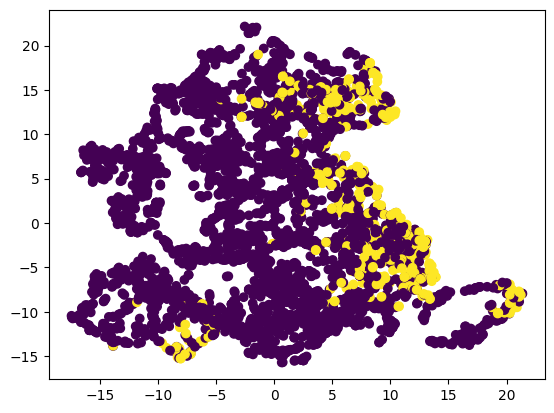

In [ ]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y);

In [ ]:
test(X_tsne, y)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       552
           1       0.50      0.54      0.52        68

    accuracy                           0.89       620
   macro avg       0.72      0.74      0.73       620
weighted avg       0.89      0.89      0.89       620



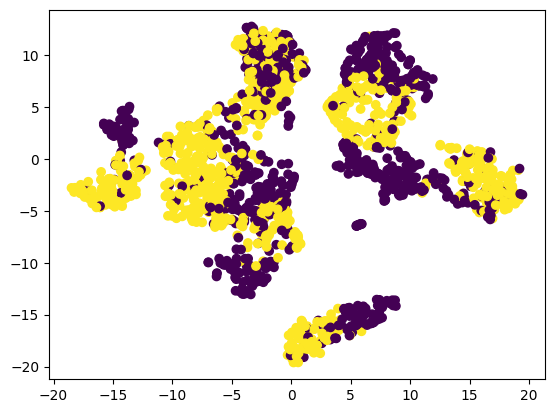

In [ ]:
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_scaled[:2000])
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y[:2000]);

In [ ]:
test(X_tsne, y[:2000])

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       149
           1       0.88      0.88      0.88       151

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



+kmeans


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


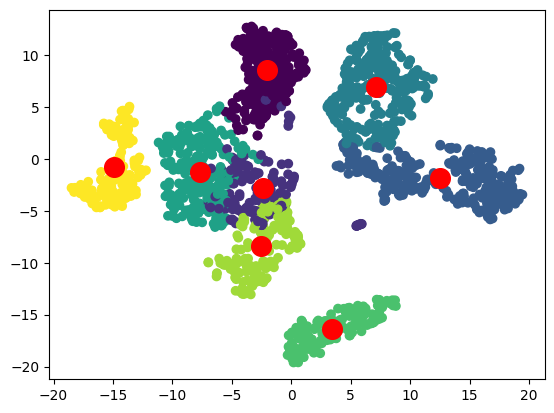

In [ ]:
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [ ]:
silhouette_score(X_tsne, kmeans.labels_)

0.56683844

In [ ]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled[:2000])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

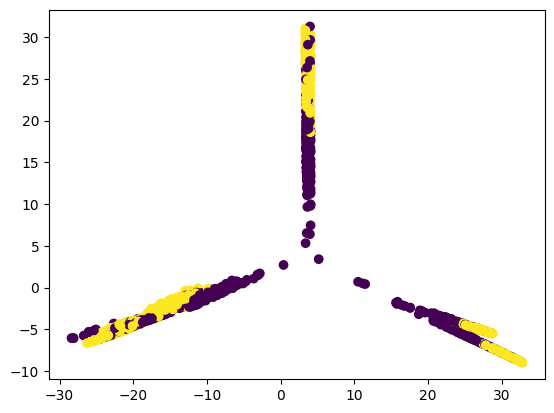

In [ ]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y[:2000]);

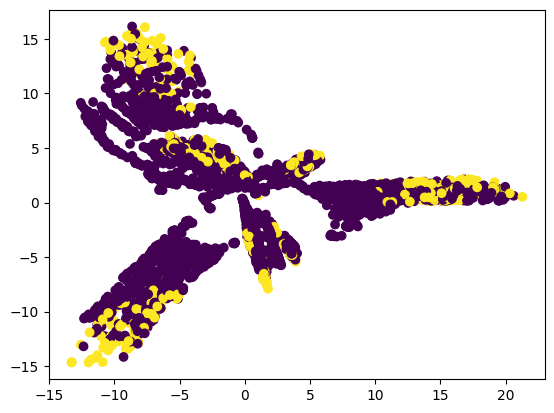

In [ ]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y);

# PCA

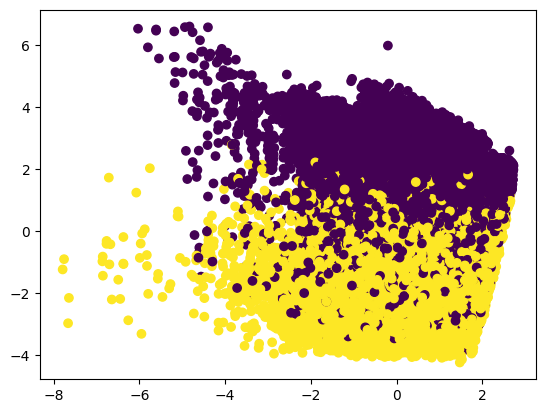

In [ ]:
def pca(X, num_components):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    cov_matrix = np.cov(X_scaled, rowvar=False)

    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

    # Сортировка собственных значений в убывающем порядке
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # Выбор нужного числа главных компонент
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # Проецирование данных на главные компоненты
    X_reduced = np.dot(eigenvector_subset.transpose(), X_scaled.transpose()).transpose()
    return X_reduced

pca3 = pca(X, 2)
plt.scatter(pca3[:,1], pca3[:,0], c=y);

In [ ]:
pca3

array([[ 2.57435503,  1.33285143],
       [ 2.96398605, -0.53735968],
       [ 1.97883933,  1.9018742 ],
       ...,
       [ 3.15057428, -0.50435209],
       [ 1.5571306 , -0.8971461 ],
       [ 2.99694947, -0.92255263]])

In [ ]:
test(pca3, y)

              precision    recall  f1-score   support

           0       0.51      0.57      0.54      2074
           1       0.50      0.44      0.47      2032

    accuracy                           0.51      4106
   macro avg       0.51      0.51      0.51      4106
weighted avg       0.51      0.51      0.51      4106



In [ ]:
def KMeanss(data, k=6, num_iter=10, min_distance=0.005, seed=0):
  np.random.seed(seed)
  centroid_ids = np.random.choice(data.shape[0], k, replace=False)
  centroids = data[centroid_ids]
  #print('First points:\n', centroids)

  for i in range(num_iter):
    clusters = {x: [] for x in range(k)}
    res = []

    for x in data:
      distances = np.linalg.norm(centroids - x, axis=1)
      cluster_ind = distances.argmin()
      clusters[cluster_ind].append(x)
      res.append(cluster_ind)
    new_centroids = {}
    count = []
    for cluster in clusters:
      new_centroids[cluster] = np.mean(clusters[cluster], axis=0)
      count.append(len(clusters[cluster]))

    new_centroids = np.array(list(new_centroids.values()))

    print(count)
    #print(new_centroids)

    is_stop = True
    for cluster in range(len(centroids)):
      if np.linalg.norm(centroids[cluster] - new_centroids[cluster]) > min_distance:
        is_stop = False
        break
    if is_stop:
      print(f'stopping at iter {i}')
      break

    centroids = new_centroids

  return centroids, clusters, res

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score, homogeneity_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

In [ ]:
data = pca3
data_y = y
centroids, clusters, res = KMeanss(data)
import pandas as pd
from operator import itemgetter
pd.DataFrame(sorted(centroids, key=itemgetter(0)), columns=['x','y']).T


#print(res, data_y)
#print(data_y)
print("homogeneity_score: ", homogeneity_score(data_y, res))
print( "rand score: ", rand_score(data_y, res))
print( "v_measure score: ", v_measure_score(data_y, res))

print( "silhouette score: ", silhouette_score(data, res))
print( "davies_bouldin_score: ", davies_bouldin_score(data, res))
#centroids

[2547, 7345, 6117, 485, 9444, 1430]
[3904, 6604, 6406, 694, 7886, 1874]
[4622, 5926, 6228, 968, 7320, 2304]
[5037, 5381, 6121, 1254, 6958, 2617]
[5233, 5052, 6069, 1485, 6632, 2897]
[5273, 4846, 5870, 1650, 6451, 3278]
[5197, 4708, 5542, 1770, 6452, 3699]
[4953, 4693, 5377, 1836, 6486, 4023]
[4650, 4789, 5231, 1870, 6549, 4279]
[4356, 4911, 5097, 1917, 6617, 4470]
homogeneity_score:  0.48543147745973314
rand score:  0.5985042624419361
v_measure score:  0.27666372212078333
silhouette score:  0.3304301214648452
davies_bouldin_score:  0.986584414203016


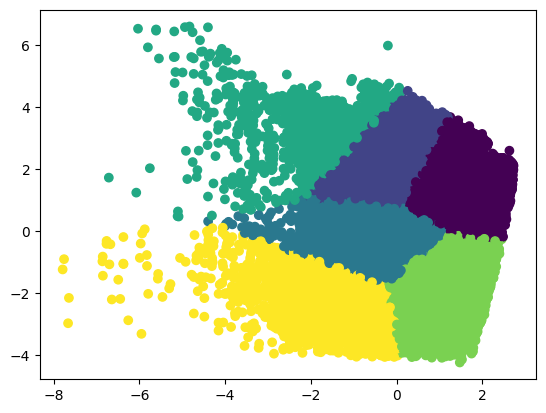

In [ ]:
plt.scatter(pca3[:,1], pca3[:,0], c=res)

# RegCoef

In [ ]:
def mserror_mat(X, w, y):
    y_pred = X @ w
    return np.sum((y - y_pred) ** 2) / len(y_pred)

# функция градиента
def gr_mserror_mat(X, w, y):
    y_pred = X @ w
    return 2/len(X)*(y - y_pred) @ (-X)

# первоначальное точка
weights = np.zeros(X.shape[1])
weights

# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# размер шага (learning rate)
learning_rate = 0.1

next_weights = weights
# количество итерация
n = 20
for i in range(n):
    cur_weights = next_weights

    # движение в негативную сторону вычисляемого градиента
    next_weights = cur_weights - learning_rate * gr_mserror_mat(X, cur_weights, y)

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {cur_weights}| Следующая точка {next_weights}")
    print(f"MSE {mserror_mat(X, cur_weights, y)}")
    print("--------------------------------------------------------")

    if np.linalg.norm(cur_weights - next_weights, ord=2) <= eps:
        break

Итерация: 0
Текущая точка [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]| Следующая точка area                                 8.895046e+09
latitude                             1.025726e+08
longitude                            3.911266e+08
Bedrooms                             1.561607e+07
Bathrooms                            1.573977e+07
Balcony                              5.092438e+06
parking                              5.092438e+06
Lift                                 5.092438e+06
Status_Ready to Move                -1.368209e+09
Status_Under Construction           -7.264748e+05
neworold_New Property               -1.789832e+08
neworold_Resale                     -1.189952e+09
Furnished_status_Furnished          -2.706835e+08
Furnished_status_Semi-Furnished     -2.379879e+08
Furnished_status_Unfurnished        -8.602641e+08
type_of_building_Flat               -1.275482e+09
type_of_building_Individual House   -9.345393e+07
dtype: float64
MSE 1498119716322941.8
----------------

In [ ]:
next_weights[:-1]

area                              -3.873351e+115
latitude                          -4.857241e+113
longitude                         -1.848501e+114
Bedrooms                          -6.943874e+112
Bathrooms                         -6.888797e+112
Balcony                           -2.468533e+112
parking                           -2.468533e+112
Lift                              -2.468533e+112
Status_Ready to Move               6.466607e+114
Status_Under Construction          2.245553e+111
neworold_New Property              8.121129e+113
neworold_Resale                    5.656740e+114
Furnished_status_Furnished         1.084480e+114
Furnished_status_Semi-Furnished    1.180277e+114
Furnished_status_Unfurnished       4.204096e+114
type_of_building_Flat              6.028881e+114
dtype: float64

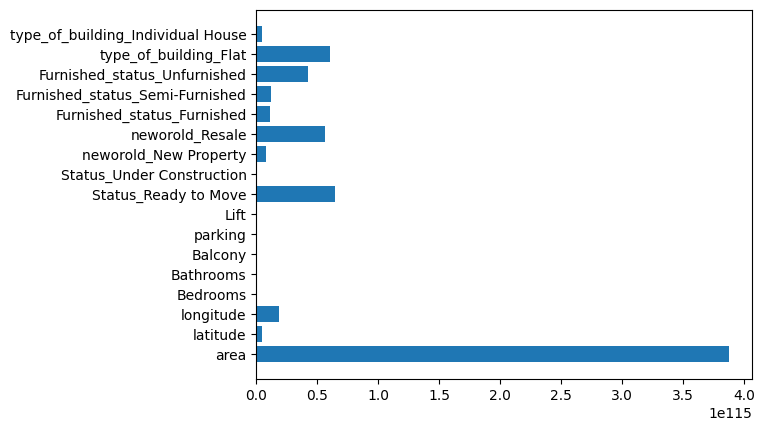

In [ ]:
plt.barh(width=abs(next_weights), y=X.columns);